# Project Title: IPL Score Prediction

### *importing libraries*

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


### Loading datasets

In [39]:
df=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\Data Science Course\Module_Projects\ML_Module_Project\ipl.csv")

In [40]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


## Exploratory Data Analysis

In [41]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
df.shape

(76014, 15)

In [7]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [11]:
df['bat_team'].value_counts()

bat_team
Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: count, dtype: int64

In [12]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning/Data Preprocessing

In [42]:
#Removing Unwanted Columns
columns_to_keep=['date','bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']
print(f'Before Removing Irrelevant Columns : {df.shape}')
df = df[columns_to_keep]
print(f'After Removing Irrelevant Columns : {df.shape}')

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 9)


In [14]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [43]:
#Filtering Consistent Teams
consistent_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab', 'Kolkata Knight Riders',
    'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'
]
print(f'Before Removing Inconsistent Teams : {df.shape}')
df = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)]
print(f'After Removing Irrelevant Columns : {df.shape}')

print(f"Consistent Teams : \n{df['bat_team'].unique()}")


Before Removing Inconsistent Teams : (76014, 9)
After Removing Irrelevant Columns : (39516, 9)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Mumbai Indians'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Sunrisers Hyderabad']


In [44]:
#Removing Early Match Data
print(f'Before Removing Overs : {df.shape}')
df=df[df['overs']>=5.0]
print(f'After Removing Overs : {df.shape}')


Before Removing Overs : (39516, 9)
After Removing Overs : (29462, 9)


In [45]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [18]:
#Date Conversion
df['date']=pd.to_datetime(df['date'])

## Feature Selection

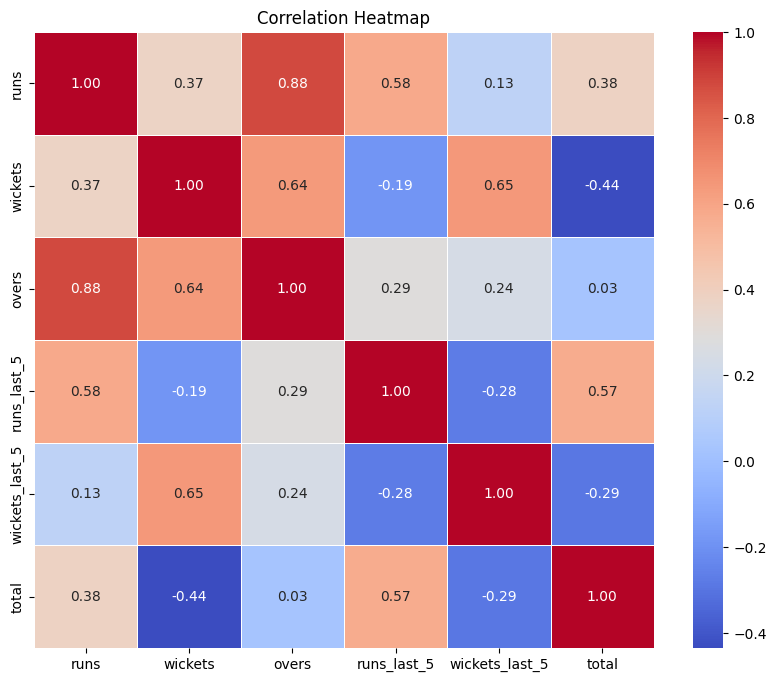

In [46]:
numeric_data = df.select_dtypes(include='number')
corr_m = numeric_data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Encoding Categorical Features

In [20]:
# le = LabelEncoder()
# for col in ['bat_team', 'bowl_team']:
#     df[col] = le.fit_transform(df[col])
# df.head()

In [47]:
#Performing One Hot Encoding
bat_team_encoded = pd.get_dummies(df['bat_team'], prefix='bat_team')
bowl_team_encoded = pd.get_dummies(df['bowl_team'], prefix='bowl_team')

df = pd.concat([df, bat_team_encoded, bowl_team_encoded], axis=1)

df.drop(['bat_team', 'bowl_team'], axis=1, inplace=True)


In [22]:
data=df

In [48]:
data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'year'],
      dtype='object')

In [49]:
cn=['bat_team_Chennai Super Kings', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad']
data[cn] = data[cn].astype(int)

In [50]:
data.tail()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,year
75884,2017-05-19,106,9,18.1,29,4,107,0,0,1,...,0,0,0,0,0,1,0,0,0,2017
75885,2017-05-19,107,9,18.2,29,4,107,0,0,1,...,0,0,0,0,0,1,0,0,0,2017
75886,2017-05-19,107,9,18.3,28,4,107,0,0,1,...,0,0,0,0,0,1,0,0,0,2017
75887,2017-05-19,107,9,18.4,24,4,107,0,0,1,...,0,0,0,0,0,1,0,0,0,2017
75888,2017-05-19,107,10,18.5,23,5,107,0,0,1,...,0,0,0,0,0,1,0,0,0,2017


# Model Building
## Splitting Data into Training and Testing Sets

In [26]:
# Extract the year from the 'date' column
data['year'] = data['date'].dt.year

# Split the data into training and test sets
train_df = data[data['year'] <= 2016]
test_df = data[data['year'] == 2017]

In [27]:
train_df.drop(columns={'date','year'},inplace=True,axis=1)


In [28]:
test_df.drop(columns={'date','year'},inplace=True,axis=1)


In [29]:
X=train_df.drop(['total'],axis=1)
y=train_df['total']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
print(f"Training Set : {X_train.shape}\nTesting Set : {X_test.shape}")

Training Set : (22083, 19)
Testing Set : (5521, 19)


## Linear Regression

In [31]:
# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)

Linear Regression:
  Mean Absolute Error (MAE): 13.059157613361842
  Mean Squared Error: 309.86262160567725
  R² Score: 0.6335062066107808
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.62677915 0.63449986 0.64251948 0.63263877 0.63172956]
  Mean CV Score: 0.6336333642886524


## Decision Tree Regression

In [32]:
# Initialize Decision Tree model
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)

Decision Tree Regression:
  Mean Absolute Error (MAE): 4.026263358087303
  Mean Squared Error: 136.16645535229125
  R² Score: 0.838947464860955
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.83118767 0.82074858 0.82914274 0.84525412 0.81131805]
  Mean CV Score: 0.8275302303097403


## Random Forest Regression

In [33]:
# Initialize Random Forest model
forest_model = RandomForestRegressor()

# Train the model
forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = forest_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(forest_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)

Random Forest Regression:
  Mean Absolute Error (MAE): 4.199038187526415
  Mean Squared Error: 54.36820690749759
  R² Score: 0.9356953404510482
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.91722468 0.91974421 0.92268036 0.92336349 0.91981208]
  Mean CV Score: 0.920564963509739


## AdaBoost Regressor

In [34]:
# Initialize AdaBoost model with Linear Regression as base
adaboost_model = AdaBoostRegressor(base_estimator=LinearRegression())

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("AdaBoost Regressor:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)

AdaBoost Regressor:
  Mean Absolute Error (MAE): 13.405394167500672
  Mean Squared Error: 316.1120803299447
  R² Score: 0.6261145831144792
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.6219002  0.62512296 0.63420552 0.62094853 0.62399506]
  Mean CV Score: 0.62523445600015


## Advanced Models (XGBoost and Neural Networks)

In [35]:
import xgboost as xgb

# Create XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) for XGBoost: {mae}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)


Mean Absolute Error (MAE) for XGBoost: 10.271057392846542
  Mean Squared Error: 316.1120803299447
  R² Score: 0.6261145831144792
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.62177244 0.62150923 0.63714603 0.62162916 0.62508378]
  Mean CV Score: 0.6254281297880677


## Neural Network (MLPRegressor):

In [36]:
from sklearn.neural_network import MLPRegressor

# Create MLP model (Neural Network)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print(f"Mean Absolute Error (MAE) for Neural Network: {mae_mlp}")
print(f"  Mean Squared Error: {mse}")
print(f"  R² Score: {r2}")
print("-" * 100)

# Cross-validation scores
cv_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5)
print(f"  Cross-Validation Scores: {cv_scores}")
print(f"  Mean CV Score: {cv_scores.mean()}")
print("=" * 100)


Mean Absolute Error (MAE) for Neural Network: 10.664607661956211
  Mean Squared Error: 316.1120803299447
  R² Score: 0.6261145831144792
----------------------------------------------------------------------------------------------------
  Cross-Validation Scores: [0.62302218 0.62342939 0.63617337 0.62157946 0.62278522]
  Mean CV Score: 0.6253979269308562


## Model Comparison

- Best Model: *Random Forest Regression* is the best-performing model based on MAE, MSE, R² score, and cross-validation mean score.
- Second Choice: *Decision Tree Regression* is also a strong performer.
- Lower Performers: AdaBoost, XGBoost, and Neural Networks performed similarly but with lower accuracy compared to tree-based models.

## Final Model Selection

### Random Forest Regression is the best performing model based on the evaluation metrics, with Decision Tree Regression being a close second. Given the simplicity and effectiveness of Random Forest Regression, it is chosen as the final model.

# Predictions

In [51]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest_model):
    # Team encoding (map team names to indices)
    team_encoding = {
        'Chennai Super Kings': [1, 0, 0, 0, 0, 0, 0],
        'Kings XI Punjab': [0, 1, 0, 0, 0, 0,0],
        'Kolkata Knight Riders': [0, 0, 1, 0, 0, 0,0],
        'Mumbai Indians': [0, 0, 0, 1, 0,0, 0],
        'Rajasthan Royals': [0, 0, 0, 0, 1,0, 0],
        'Royal Challengers Bangalore': [0, 0, 0, 0, 0, 0, 1],
        'Sunrisers Hyderabad': [0, 0, 0, 0, 0, 0, 1]
    }

    # Initialize prediction array
    prediction_array = team_encoding.get(batting_team, [0]*7) + team_encoding.get(bowling_team, [0]*7)

    # Add match features
    prediction_array += [runs, wickets, overs, runs_last_5, wickets_last_5]

    # Convert to numpy array for prediction
    prediction_array = np.array([prediction_array])

    # Make prediction
    pred = model.predict(prediction_array)
    return int(round(pred[0]))


In [52]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 132 || Actual Score : 147


In [53]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = predict_score(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 132 || Actual Score : 176


In [54]:
batting_team='Royal Challengers Bangalore'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.0, runs=159, wickets=2, runs_last_5=64, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 152 || Actual Score : 153
